# **Importing The Modules**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import seaborn as sns

# **Reading The Data**

In [6]:
df = pd.read_csv('/content/housing_prices.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Finding The Null Values**

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: >

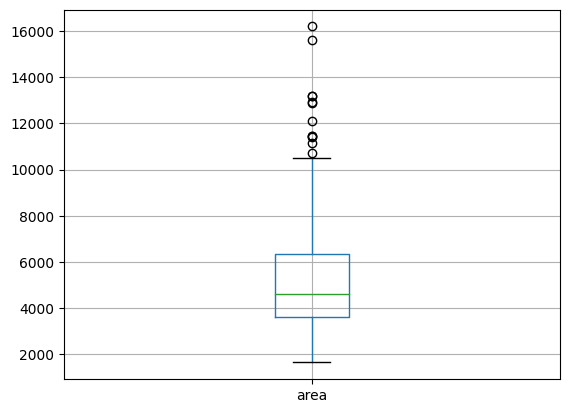

In [9]:
df.boxplot('area')

In [10]:
df['area'] = zscore(df['area'])
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,-1.564498e-16,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,1.000919e+00,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,-1.614530e+00,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,-7.151451e-01,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,-2.539222e-01,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,5.578300e-01,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,5.096263e+00,6.000000,4.000000,4.000000,3.000000


In [11]:
df.dtypes

price                 int64
area                float64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

# **Label Encoding converting the object data into int**

In [12]:
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in col:
  df[i] = LabelEncoder().fit_transform(df[i])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0,0


# Finding the Correlation

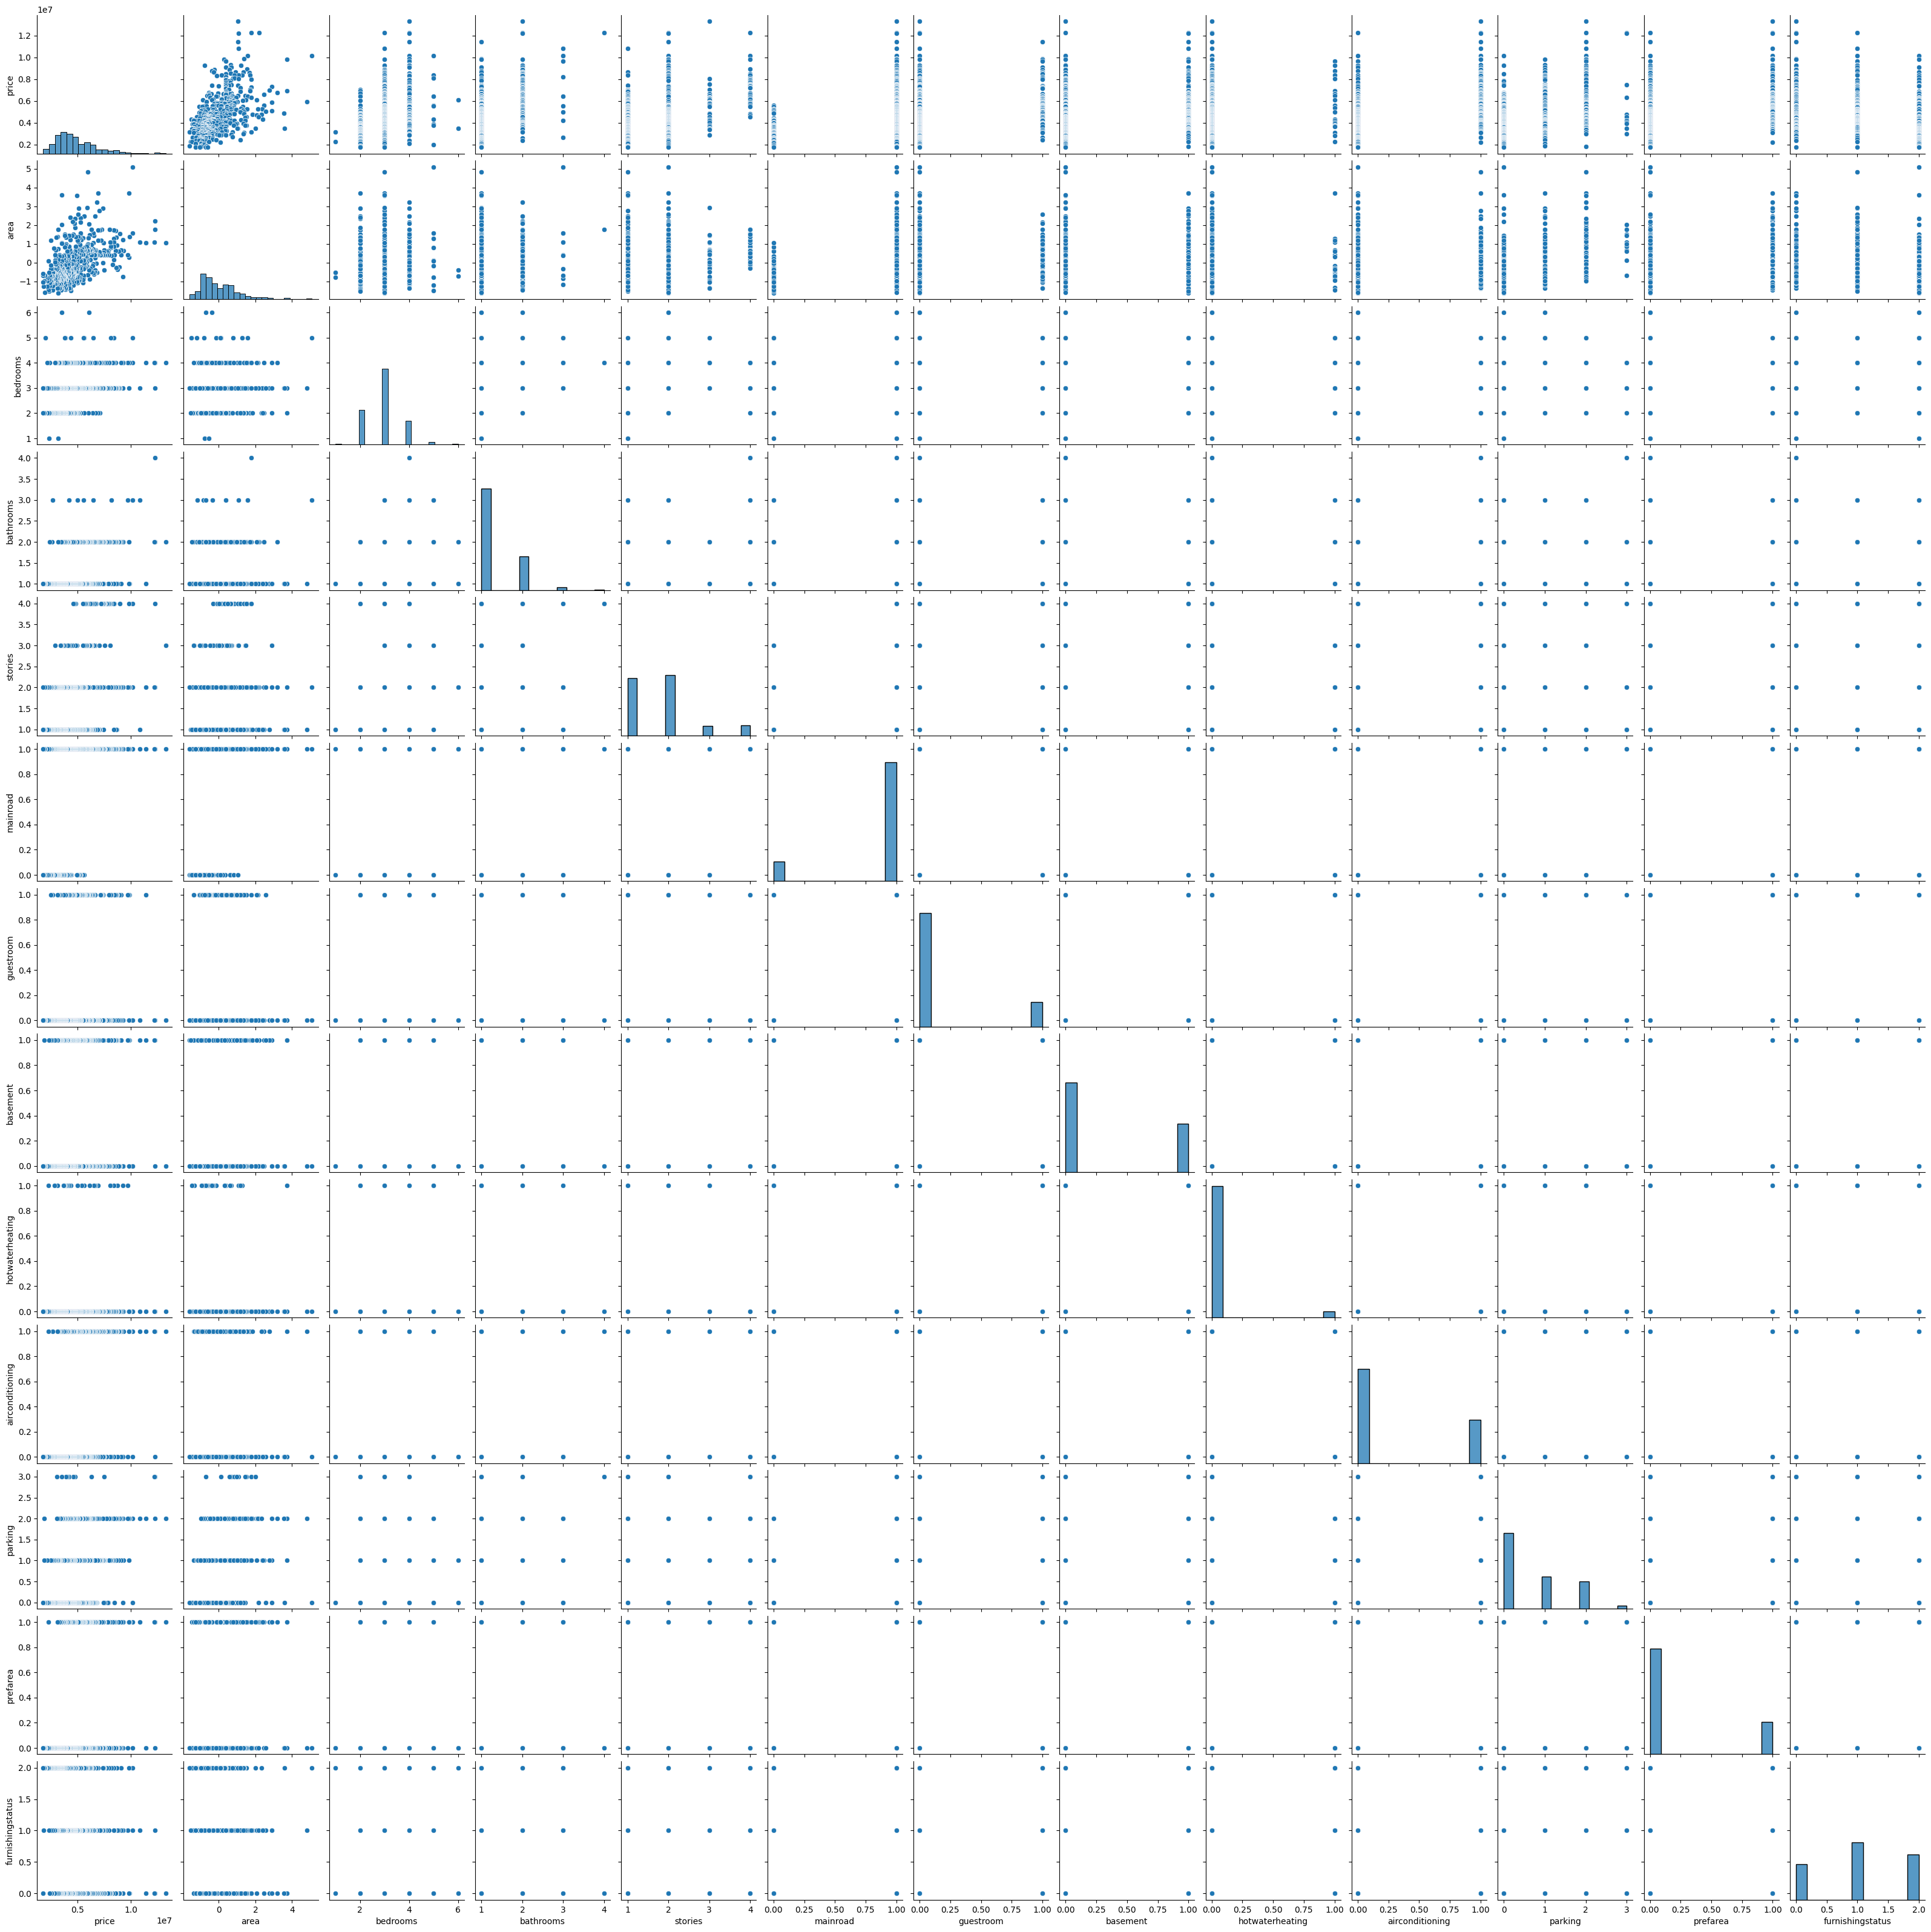

In [13]:
sns.pairplot(df)
plt.show()


# **Finding the Correlation**



In [14]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


# **Heat Map for the correlation matrix**

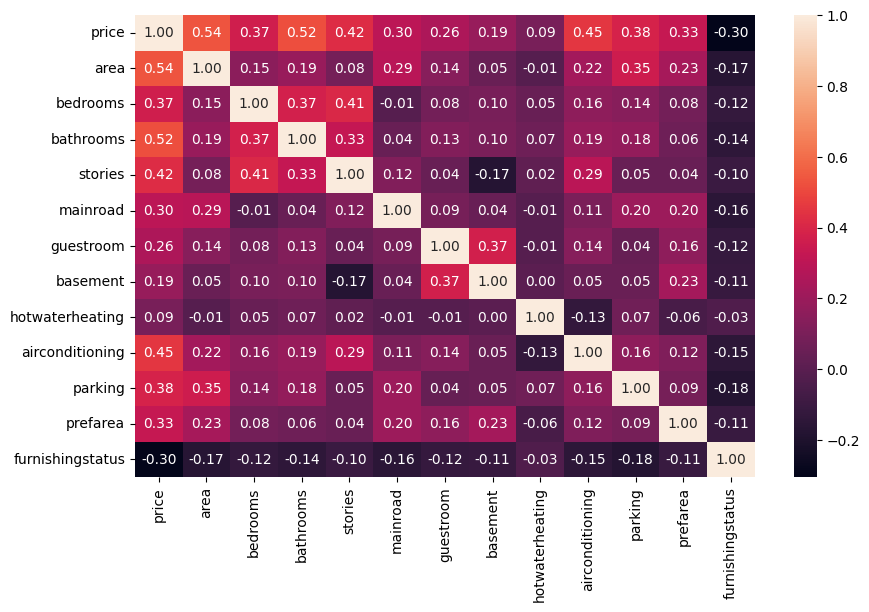

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [16]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

trani_x,test_x,train_y,test_y = train_test_split(df.drop('price',axis=1),df,test_size=0.2,random_state=42)

# **DecisionTreeRegressor Algorithem**

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
model = DecisionTreeRegressor()
model.fit(trani_x,train_y)
acc = model.score(trani_x,train_y)
r2 = r2_score(test_y,model.predict(test_x))
print(f'Accuracy {acc}')
print(f'r2 Error {r2}')

Accuracy 0.9998877144945276
r2 Error 0.2521883286941198


# **RandomForestRegressor Algorithem**

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(trani_x,train_y)
acc = model.score(trani_x,train_y)
pred = model.predict(test_x)
r2 = r2_score(test_y,model.predict(test_x))
print(f'Accuracy {acc}')
print(f'r2 Error {r2}')

Accuracy 0.9574588044001225
r2 Error 0.65999693227279


# **LinearRegression Algorithem**

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trani_x,train_y)
acc = model.score(trani_x,train_y)
pred = model.predict(test_x)
r2 = r2_score(test_y,model.predict(test_x))
print(f'Accuracy {acc}')
print(f'r2 Error {r2}')


Accuracy 0.97580330363726
r2 Error 0.9730365707097521
